## Feed forward Network from scratch

> In this notebook, we use sentiment data to build our classifier from scratch in numpy.

> We'll write both the forward and backward pass

In [49]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Load Data

In [50]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [51]:
print('Total reviews in the dataset : ', len(reviews))
print('Total labels in the dataset : ', len(set(labels)))

Total reviews in the dataset :  25000
Total labels in the dataset :  2


In [52]:
for i in range(8):
    pretty_print_review_and_label(np.random.randint(0,len(reviews)))

POSITIVE	:	while returning from a christmas eve shopping trip  an abused suburban housewife...
POSITIVE	:	i watch this movie all the time . i  ve watched it with family ages  to    and e...
NEGATIVE	:	i saw this film under the title of  tied up  . in general i have enjoyed dolph  ...
POSITIVE	:	despite the other comments listed here  this is probably the best dirty harry mo...
POSITIVE	:	this movie is cold  bare truth . often we think  oh no  that won  t happen to me...
POSITIVE	:	writer  director brian de palma is best known for his string of films that have ...
NEGATIVE	:	with the releasing of  farligt frflutet  swedish film industry has truly hit roc...
POSITIVE	:	  cry freedom  is not just a movie . it is a historical account  heroic story  a...


### 2. Testing a theory
> More positive adjectives are used in positive sentences and more negative are used in negative sentences.

Let's check this theory

In [53]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

# Count words in POSITIVE and storing in a positive counter and also in total counter. Same for negative
for review, label in zip(reviews, labels):
    if label=='POSITIVE':
        for word in review.split(' '):
            positive_counts[word]+=1
            total_counts[word]+=1
    if label=='NEGATIVE':
        for word in review.split(' '):
            negative_counts[word]+=1
            total_counts[word]+=1
    


In [54]:
positive_counts.most_common(10)

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235)]

In [55]:
#taking ratio of positive to negative then calculate log for + and - sign
pos_neg_ratio = Counter()
for word in list(total_counts):
    pos_neg_ratio[word] = np.log((positive_counts[word]+1) / (negative_counts[word] + 1))

print('positive/negative ratio for amazing: ', pos_neg_ratio['amazing'])
print('positive/negative ratio for terrible: ', pos_neg_ratio['terrible'])
print('vocab :', len(list(pos_neg_ratio)))

positive/negative ratio for amazing:  1.3929263134236418
positive/negative ratio for terrible:  -1.7250680947293828
vocab : 74074


In [56]:
pos_neg_ratio.most_common(10)

[('edie', 4.700480365792417),
 ('antwone', 4.48863636973214),
 ('din', 4.418840607796598),
 ('gunga', 4.204692619390966),
 ('goldsworthy', 4.189654742026425),
 ('gypo', 4.110873864173311),
 ('yokai', 4.110873864173311),
 ('paulie', 4.085976312551584),
 ('visconti', 3.9512437185814275),
 ('flavia', 3.9512437185814275)]

In [57]:
pos_neg_ratio.most_common()[-10:]

[('delia', -3.6109179126442243),
 ('gram', -3.6375861597263857),
 ('sarne', -3.6375861597263857),
 ('kornbluth', -3.6888794541139363),
 ('kareena', -3.7376696182833684),
 ('tashan', -3.828641396489095),
 ('hobgoblins', -3.828641396489095),
 ('slater', -3.912023005428146),
 ('uwe', -3.9318256327243257),
 ('boll', -4.276666119016055)]

> These words do not look like positive or negative. Let's add min_count and then recalculate

In [58]:
#taking ratio of positive to negative then calculate log for + and - sign
pos_neg_ratio = Counter()
min_count = 50
for word in list(total_counts):
    if total_counts[word] > min_count:
        pos_neg_ratio[word] = np.log((positive_counts[word]+1) / (negative_counts[word] + 1))
print('vocab :', len(list(pos_neg_ratio)))

vocab : 7074


In [59]:
pos_neg_ratio.most_common(10)

[('edie', 4.700480365792417),
 ('antwone', 4.48863636973214),
 ('din', 4.418840607796598),
 ('gunga', 4.204692619390966),
 ('goldsworthy', 4.189654742026425),
 ('gypo', 4.110873864173311),
 ('yokai', 4.110873864173311),
 ('paulie', 4.085976312551584),
 ('visconti', 3.9512437185814275),
 ('flavia', 3.9512437185814275)]

In [60]:
pos_neg_ratio.most_common()[-10:]

[('dreck', -2.9831534913471307),
 ('stinker', -2.9856819377004897),
 ('unwatchable', -3.0349529867072724),
 ('wayans', -3.2386784521643803),
 ('dahmer', -3.295836866004329),
 ('beowulf', -3.417726683613366),
 ('seagal', -3.4210000089583352),
 ('thunderbirds', -3.4339872044851463),
 ('uwe', -3.9318256327243257),
 ('boll', -4.276666119016055)]

> Not much better. But reduces the vocab to 10%

### Let's check out some actual adjectives

In [61]:
vocab = list(pos_neg_ratio)
adj_dic = {}
adj = ['awesome', 'great','ok','brilliant','superior', 'terrific','fantastic',
            'bad', 'atrocious', 'terrible', 'poor', 'laughable','inferior']
for i in range(len(adj)):
    if adj[i] in vocab:
        adj_dic[adj[i]] = pos_neg_ratio[adj[i]]
    else:
        print(adj[i])
df = pd.DataFrame({'adjectives': adj_dic.keys(), 'ratios': adj_dic.values()}).sort_values(by='ratios',ascending =False)
colors = ['g' if i>0 else 'r' for i in df.ratios]

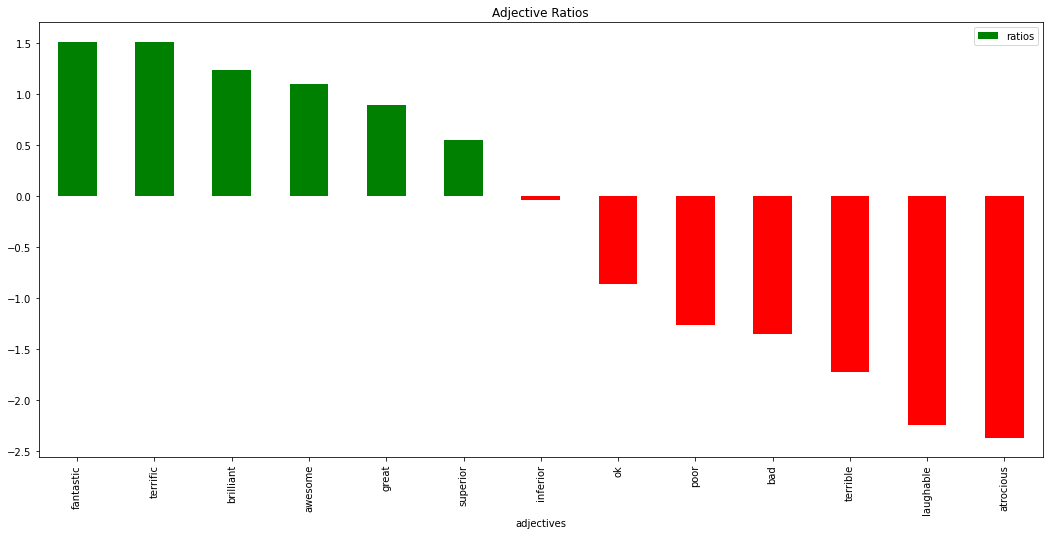

In [62]:
_=df.plot(x = 'adjectives', y ='ratios', kind='bar', figsize = (18,8), title = 'Adjective Ratios', color=colors)

> OK is on the negative side!

### 3. Building model

In [63]:
import time
import sys
import numpy as np

class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1, keep_freq=True):
        
        #to keep results same
        np.random.seed(1)
        self.reviews = reviews
        self.labels = labels
        self.hidden_nodes = hidden_nodes
        self.learning_rate = learning_rate
        self.data_size = len(reviews)
        
        
        # if we want counts or only ones in one hot
        self.keep_freq=keep_freq
        
        #preprocess data
        self.preprocess_data()
        
        #Initiate Network
        self.init_network()
    
    def preprocess_data(self):
        '''
        i. make vocab from reviews and labels and store in variable
        ii. create lengths for vocab lengths
        iii. create word2index and index2word
        '''
        #i. Create vocab
        self.review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                self.review_vocab.add(word)
        
        self.label_vocab = set()
        for label in labels:
            self.label_vocab.add(label)
        
        
        #2. Length of vocab
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        #3. create indexes
        self.word2index = {}
        for i,word in enumerate(self.review_vocab):
            self.word2index[word] = i
            
        self.index2word = {y:x for x,y in self.word2index.items()}
        
    def init_network(self):
        '''
        Initiate the network structure
        '''
        self.input_size = self.review_vocab_size
        self.hidden_size = self.hidden_nodes
        self.output_size = 1
        
        
        #Initialize the weights by reducing the variance to 1 for each layer. Accelarates training
        self.w_0_1 = np.random.normal(scale=1 / self.input_size ** .5, size = (self.input_size, self.hidden_size))
        self.w_1_2 = np.random.normal(scale=1 / self.hidden_size ** .5, size = (self.hidden_size, self.output_size))
        
        # input layer with shape (1, input_size)
        self.layer_0 = np.zeros((1,self.input_size))
        
    
    def update_input_layer(self,review):
        '''
            One hot encode data (count in this case)
        '''

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                if self.keep_freq:
                    self.layer_0[0][self.word2index[word]] += 1  #count for each word
                else:
                    self.layer_0[0][self.word2index[word]] = 1  #1 for each word. i,e, present/not present
        return self.layer_0
        
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    
    def forward_pass(self):
        
        #input_data-> (1, self.input_size)
        #w_0_1 -> (self.input_size, self.hidden_size)
        
        # (m, hidden_size)
        self.a1 = self.sigmoid(np.dot(self.input_data, self.w_0_1))
        
        # (m,1)
        self.a2 = self.sigmoid(np.dot(self.a1, self.w_1_2))
        
        self.loss = self.label - self.a2 
        
        
        
        
    def backward_pass(self):
        
        # (m,output_size)
        error_term_1_2 = self.loss * self.a2 * (1-self.a2)
        # (hidden_size, outputsize)
        self.w_1_2+= self.learning_rate * np.dot(self.a1.T , error_term_1_2)
        
        # (m, hidden_size)
        error_term_0_1 = np.dot(error_term_1_2 , self.w_1_2.T) * self.a1 * (1-self.a1)
        # (input_size, hidden_size)
        self.w_0_1+= self.learning_rate *  np.dot(self.input_data.T, error_term_0_1)
        
        
        
    
    def train(self, epochs ,train_reviews, train_labels):
        epoch_accuracies = []
        for epoch in range(epochs):
            counter=0
            right_preds = 0
            for review, label in zip(train_reviews, train_labels):
                counter+=1
                
                self.input_data = self.update_input_layer(review)
                self.label = self.get_target_for_label(label)
                
                self.forward_pass()
                self.backward_pass()
                
                
                if (self.a2>=0.5 and self.label==1) or (self.a2<0.5 and self.label==0):
                    right_preds+=1
                
                #if counter%1000==0:
                #    print('avg accuracy after {}: {:.1%}'.format(counter, right_preds/counter) )
            print('avg accuracy after {} epoch: {:.1%}'.format(epoch+1, right_preds/counter) )
            epoch_accuracies.append(right_preds/len(train_reviews))
        
        
        print(epoch_accuracies)
        plt.plot(epoch_accuracies)
    
    
    def test(self, test_reviews, test_labels):
        counter=0
        right_preds=0
        for review, label in zip(test_reviews, test_labels):
                counter+=1
                
                self.input_data = self.update_input_layer(review)
                self.label = self.get_target_for_label(label)
                
                self.forward_pass()
                
                if (self.a2>=0.5 and self.label==1) or (self.a2<0.5 and self.label==0):
                    right_preds+=1
                
                #if counter%100==0:
                #    print('avg accuracy after {}: {:.1%}'.format(counter, right_preds/counter) )
        print('Test accuracy: {:.1%}'.format(right_preds/len(test_reviews)) )
        
                
        
                

### What happens if we use counts for one hot?
1. With lr = 0.1
2. with lr = 0.001

avg accuracy after 1 epoch: 43.1%
avg accuracy after 2 epoch: 58.9%
avg accuracy after 3 epoch: 62.9%
avg accuracy after 4 epoch: 63.3%
avg accuracy after 5 epoch: 64.3%
[0.43115688431156884, 0.589041095890411, 0.6292370762923708, 0.6325367463253675, 0.6433356664333567]
Test accuracy: 63.3%


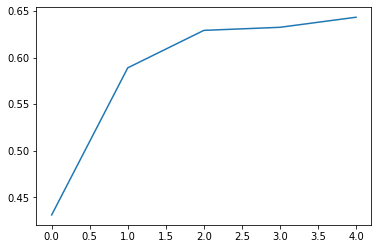

In [64]:
#1. lr=0.1
sentnet1 = SentimentNetwork(reviews, labels, hidden_nodes = 10, learning_rate = 0.1, keep_freq=True) #
sentnet1.train(5,reviews[:10001],labels[:10001])
sentnet1.test(reviews[-10000:], labels[-10000:])

avg accuracy after 1 epoch: 58.8%
avg accuracy after 2 epoch: 67.0%
avg accuracy after 3 epoch: 70.8%
avg accuracy after 4 epoch: 73.4%
avg accuracy after 5 epoch: 75.2%
[0.5880411958804119, 0.6697330266973303, 0.7076292370762923, 0.7339266073392661, 0.7521247875212479]
Test accuracy: 74.7%


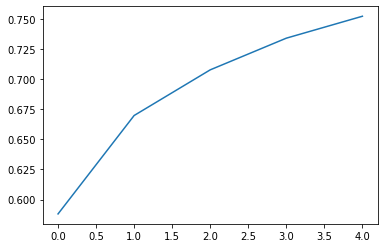

In [65]:
#2. lr=0.001
sentnet1 = SentimentNetwork(reviews, labels, hidden_nodes = 10, learning_rate = 0.001, keep_freq=True) #
sentnet1.train(5,reviews[:10001],labels[:10001])
sentnet1.test(reviews[-10000:], labels[-10000:])

> Observation : We can see that we needed lower learning rate when we used counts. That is because the skewed values in the columns. The weight updates depend on the inputs. So some weights have very high updates and some very low.

### $\triangle w = -\eta*(y-\hat{y}) * f\prime(h) * x$ 

If x>>0 or x<<0, the $f\prime(h)$ of sigmoid (which is $\sigma(h)*(1-\sigma(h))$ are near to 0. So by normalising (mean=0, sd=1) we get better gradients as it scaledown the input values considerably.

### What happens if we use 1/0 for one hot?
1. With lr = 0.1
2. with lr = 0.001

avg accuracy after 1 epoch: 82.7%
avg accuracy after 2 epoch: 91.0%
avg accuracy after 3 epoch: 94.8%
avg accuracy after 4 epoch: 96.8%
avg accuracy after 5 epoch: 97.7%
[0.8267173282671733, 0.9101089891010898, 0.9479052094790521, 0.9683031696830317, 0.9774022597740226]
Test accuracy: 83.9%


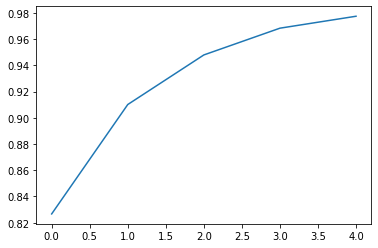

In [66]:
#1. lr=0.1
sentnet1 = SentimentNetwork(reviews, labels, hidden_nodes = 10, learning_rate = 0.1, keep_freq=False) #
sentnet1.train(5,reviews[:10001],labels[:10001])
sentnet1.test(reviews[-10000:], labels[-10000:])

avg accuracy after 1 epoch: 56.9%
avg accuracy after 2 epoch: 73.8%
avg accuracy after 3 epoch: 79.0%
avg accuracy after 4 epoch: 80.3%
avg accuracy after 5 epoch: 80.7%
[0.5692430756924307, 0.7384261573842615, 0.79002099790021, 0.8026197380261973, 0.8066193380661933]
Test accuracy: 79.2%


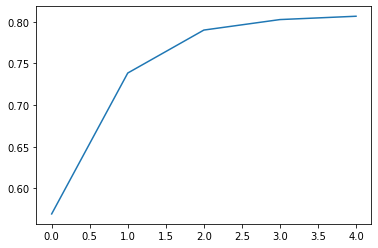

In [67]:
#2. lr=0.001
sentnet1 = SentimentNetwork(reviews, labels, hidden_nodes = 10, learning_rate = 0.001, keep_freq=False) #
sentnet1.train(5,reviews[:10001],labels[:10001])
sentnet1.test(reviews[-10000:], labels[-10000:])

> The data is now "normalized" (not exactly). Now a column can be 0 and 1. So the updates to each weight is quite uniform as compared to before. This allows us to use higher learning rates as updates to weights and hence error does not go haywire.

### Using weights to understand similar words
Words with similar weights should be closer in meanings as compared to weigths which are not similar. These are word embeddings

In [82]:
def check_similarity(word1, word2):
    word1_embedding = sentnet1.w_0_1[sentnet1.word2index[word1]]
    word2_embedding = sentnet1.w_0_1[sentnet1.word2index[word2]]
    print("Shape of embedding: ", word1_embedding.shape)
    print("Cosimilarity of {} and {} : {}".format(word1, word2, np.dot(word1_embedding,word2_embedding)/(norm(word1_embedding)*norm(word2_embedding))))

> Poitive words

**great** and **good** both are very similar

In [83]:
check_similarity('great','good')

Shape of embedding:  (10,)
Cosimilarity of great and good : 0.9190731093207843


> Negative words

**dumb** and **slow** both are very similar

In [88]:
check_similarity('dumb', 'slow')

Shape of embedding:  (10,)
Cosimilarity of dumb and slow : 0.8934478503801366


> Opposite words

**bad** and **good** both are of opposite polarity

In [89]:
check_similarity('bad','good')

Shape of embedding:  (10,)
Cosimilarity of bad and good : -0.9285942403344846
